<a href="https://colab.research.google.com/github/zahrahaulia21/Tugas2_Kelompok10_Komstat/blob/main/Tugas2_Kelompok10_Komstat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Tugas 2 Komputasi Statistika

Kelompok 10:
1. Christi Novelina Panggabean	(2106725021)
2. Mussarofah Kurnia	(2106652543)
3. Najwa Salsabila Hakim	(2106726812)
4. Titania Puteri Samudera	(2106654246)
5. Zahrah Aulia Putri	(2106724896)


###Import

In [ ]:
from sklearn import cluster, datasets
from sklearn.mixture import GaussianMixture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# load data
url = 'https://raw.githubusercontent.com/gianiarda/latihan2/main/Iris.csv'
iris = pd.read_csv(url) 

In [ ]:
# split data into features (X) and labels (y)
x = iris.iloc[:,0:4]
y = iris.iloc[:,-1]
print(x.sample(5))
print(y.sample(5))

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm
81    82            5.5           2.4            3.7
116  117            6.5           3.0            5.5
94    95            5.6           2.7            4.2
63    64            6.1           2.9            4.7
12    13            4.8           3.0            1.4
91     Iris-versicolor
76     Iris-versicolor
133     Iris-virginica
0          Iris-setosa
11         Iris-setosa
Name: Species, dtype: object


###Kmeans

Silhouette score
Silhouette score mendekati satu menunjukkan bahwa sampel berada jauh dari klaster lain. Score bernilai 0 menandakan bahwa sampel berada atau dekat di antara dua klaster. Score bernilai negatif menandakan bahwa sampel mungkin berada di klaster yang salah.

In [ ]:
# akan dicek masing-masing silhouette score untuk ncluters sebanyak 2, 3, dan 4
# untuk nclusters = 4
from sklearn.cluster import KMeans
from sklearn import metrics

nclusters1 = 4 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters1, random_state=seed)
km.fit(x)

# predict the cluster for each data point
y_cluster_kmeans1 = km.predict(x)

# silhouette score
score = metrics.silhouette_score(x, y_cluster_kmeans1)
print("Silhouette score untuk nclusters = 4 adalah ",score)

Silhouette score untuk nclusters = 4 adalah  0.5568629228470894


In [ ]:
# untuk nclusters = 5
from sklearn.cluster import KMeans
from sklearn import metrics

nclusters2 = 5 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters2, random_state=seed)
km.fit(x)

# predict the cluster for each data point
y_cluster_kmeans2 = km.predict(x)

# silhouette score
score = metrics.silhouette_score(x, y_cluster_kmeans2)
print("Silhouette score untuk nclusters = 5 adalah ",score)

Silhouette score untuk nclusters = 5 adalah  0.540632090367279


In [ ]:
# untuk nclusters = 3
from sklearn.cluster import KMeans
from sklearn import metrics

nclusters3 = 3 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters3, random_state=seed)
km.fit(x)

# predict the cluster for each data point
y_cluster_kmeans3 = km.predict(x)

# silhouette score
score = metrics.silhouette_score(x, y_cluster_kmeans3)
print("Silhouette score untuk nclusters = 3 adalah ",score)

Silhouette score untuk nclusters = 3 adalah  0.5820898597618552


Dengan asumsi kita tidak mengetahui spesies masing-masing data, dapat dilihat silhouette score untuk nclusters=3 memiliki nilai yang paling mendekati satu sehingga kami asumsikan terdapat tiga klaster pada data tersebut.

##petal length vs petal width

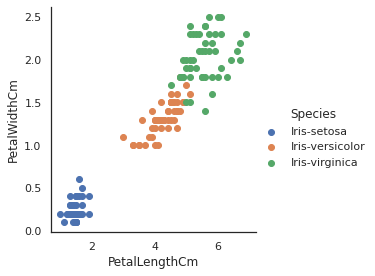

In [ ]:
# pengelompokkan sesuai tabel data
# petal length vs petal width
sns.FacetGrid(iris, hue="Species", size=4) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend();

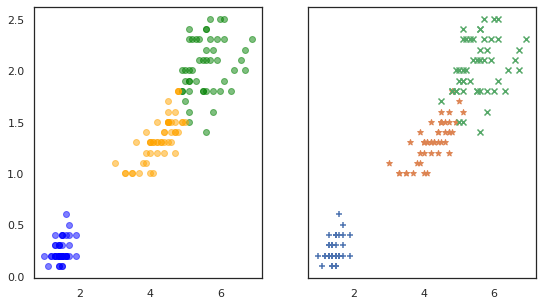

In [ ]:
# pengelompokkan data dengan pendekatan Kmeans
# petal length vs petal width
iris1 = datasets.load_iris() 
colors = ['blue', 'green', 'orange']
markers = ['+','*','x']

kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(iris1.data[:,2:4])
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9,5))
for n in range(kmeans.n_clusters):
    data_kmeanslabels = iris1.data[kmeans.labels_ == n]
    ax1.scatter(data_kmeanslabels[:, 2], data_kmeanslabels[:, 3], color=colors[n], alpha=0.5)
    data_truelabels = iris1.data[iris1.target == n]
    ax2.scatter(data_truelabels[:, 2], data_truelabels[:, 3], marker=markers[n])
plt.show()

Warna yang berbeda menunjukkan klaster yang didapatkan dari pendekatan Kmeans. Sedangkan, tanda titik data yang berbeda menunjukkan klaster sebenarnya yang terdapat pada tabel. Tugas berat dari Kmeans tidak mencerminkan ketidakpastian dalam alokasi klaster walaupun jelas terdapat tumpang tindih pada tabel.

###Gaussian Mixture Model

In [ ]:
# pengelompokkan data dengan pendekatan GMM
# petal length vs petal width

In [ ]:
#helper function to visualise covariance structure of fitted Gaussian components
from matplotlib.patches import Ellipse
def plot_cov_ellipse(cov, pos, col='b', nstd=2, ax=None, **kwargs):
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]
    if ax is None:
        ax = plt.gca()
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, color=col, alpha=0.2,**kwargs)
    ax.add_artist(ellip)
    return ellip

In [ ]:
# banyak klaster = 3
# Try GMMs using different types of covariances in 2d: petal length vs petal width
estimators = dict((cov_type, GaussianMixture(n_components=3,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])
for (name,estimator) in estimators.items():
    estimator.fit(iris1.data[:,2:4]) ## fits a mixture model using EM

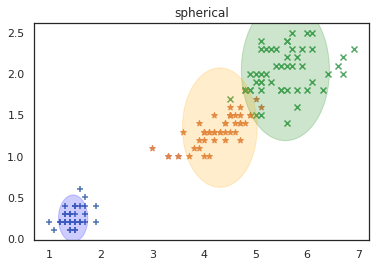

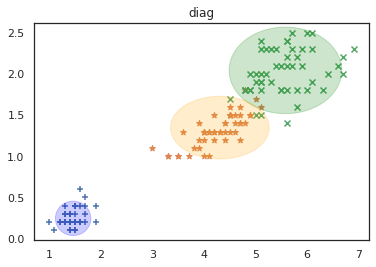

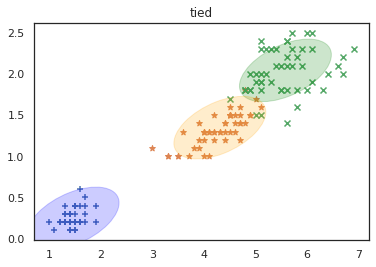

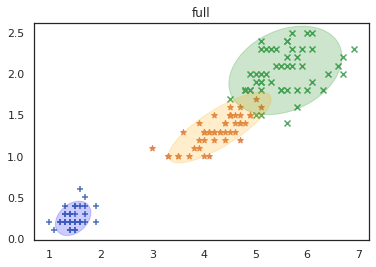

In [ ]:
for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data = iris1.data[iris1.target == n]
        plt.scatter(data[:, 2], data[:, 3], marker=markers[n])
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        #print(cov)
        pos = estimator.means_[n]
        #print(pos)
        plot_cov_ellipse(cov,pos,col=color)
    plt.title(name)
    plt.show()

###sepal length vs sepal width

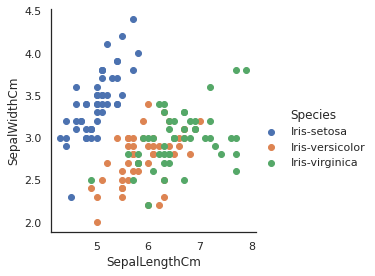

In [ ]:
# pengelompokkan sesuai tabel data
sns.FacetGrid(iris, hue="Species", size=4) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();

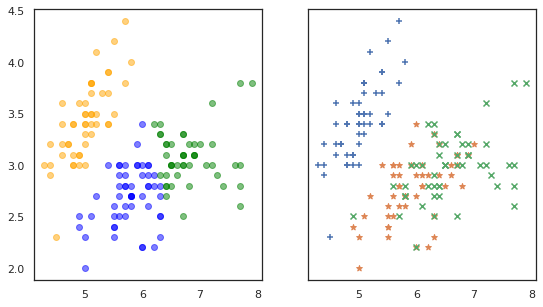

In [ ]:
# pengelompokkan data dengan pendekatan Kmeans
# sepal length vs sepal width
colors = ['blue', 'green', 'orange']
markers = ['+','*','x']

kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(iris1.data[:,0:2])
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9,5))
for n in range(kmeans.n_clusters):
    data_kmeanslabels = iris1.data[kmeans.labels_ == n]
    ax1.scatter(data_kmeanslabels[:, 0], data_kmeanslabels[:, 1], color=colors[n], alpha=0.5)
    data_truelabels = iris1.data[iris1.target == n]
    ax2.scatter(data_truelabels[:, 0], data_truelabels[:, 1], marker=markers[n])
plt.show()

In [ ]:
# pengelompokkan data dengan pendekatan GMM
# sepal length vs sepal width

In [ ]:
estimators = dict((cov_type, GaussianMixture(n_components=3,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])
for (name,estimator) in estimators.items():
    estimator.fit(iris1.data[:,0:2])

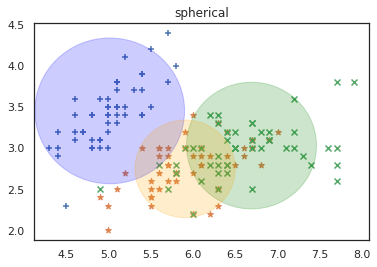

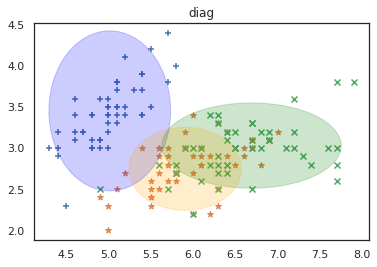

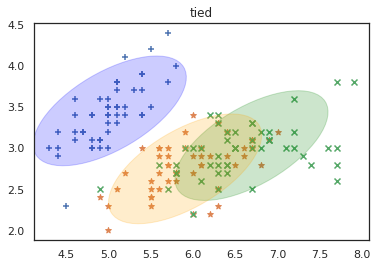

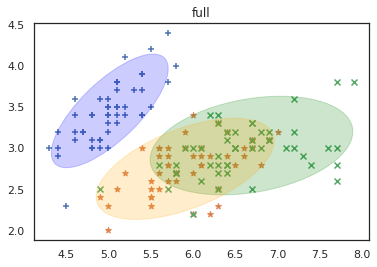

In [ ]:
for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data = iris1.data[iris1.target == n]
        plt.scatter(data[:, 0], data[:, 1], marker=markers[n])
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        #print(cov)
        pos = estimator.means_[n]
        #print(pos)
        plot_cov_ellipse(cov,pos,col=color)
    plt.title(name)
    plt.show()

Kesimpulan:
Berdasarkan visualisasi dari pengelompokkan yang dilakukan terhadap data iris, kami menyimpulkan bahwa pengelompokkan dengan pendekatan Kmeans kurang mencerminkan ketika suatu titik data berada di lokasi yang kurang pasti. Hal ini dikarenakan Kmeans membuat "hard assignments" ke klaster dan biasanya hasil dari Kmeans clustering berbentuk bulat (spherical). Di sisi lain, pengelompokkan dengan pendekatan GMM dapat menggambarkan ketika suatu titik tumpang tindih atau berada dekat di antara dua kelompok karena GMM membuat "soft assignments". Untuk data iris ini, pengelompokkan dengan pendekatan GMM lebih baik daripada pendekatan Kmeans.